# Getting the Data

[*********************100%***********************]  1 of 1 completed


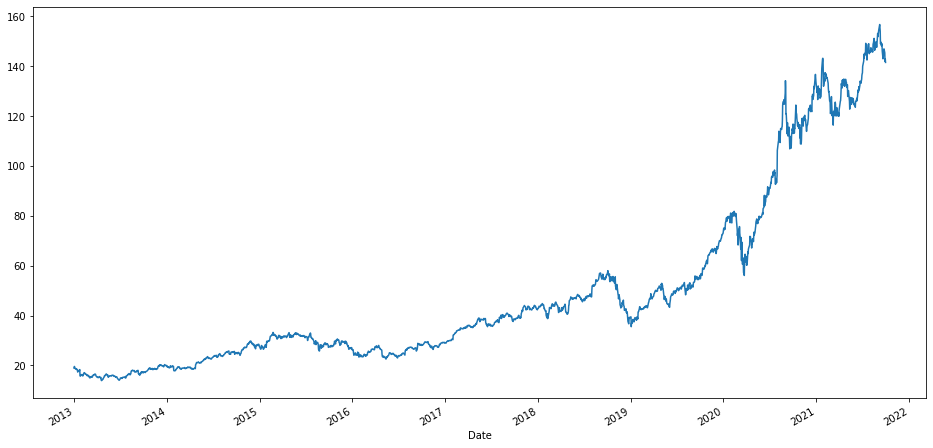

In [1]:
# Import the plotting library
import matplotlib.pyplot as plt
 
# Import the yfinance. If you get module not found error the run !pip install yfiannce from your Jupyter notebook
import yfinance as yf  

# Get the data of the stock AAPL
data = yf.download('AAPL','2013-01-01','2021-10-01')
 
# Plot the close price of the AAPL
plt.figure(figsize=(16,8))
data.Close.plot()
plt.show()

# Preparing Samples for Training the Model


In [0]:
# preparing x and y that can be feeded to the network

A = data['Close'].values
import pandas as pd
X = []
for i in range(0,len(A)-60):
    l=[A[i+j] for j in range(61)] 
    X.append(l)
X = pd.DataFrame(X,columns=[i+1 for i in range(61)])
X['Close'] = X[61]
X = X.drop(columns=[61])
X= X.values
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)                        
MinMaxScaler(feature_range=(0, 1))
X = scaler.transform(X) 
y = X[:,60]
X = X[:,0:60]

In [14]:
# A sample that can be feeded to the model //
# Every sample of day n has the data of the previous 60 days and 
# y and the closing rate of the current date

import random

print("Normalized Closing rate for past 60 days:\n\n",random.choice(X),"\n")
print("Normalized Closing rate of the current date (Predicting this value will be learnt by our model):\n\n",random.choice(y),"\n")
print("Number of samples: ",X.shape)

Normalized Closing rate for past 60 days:

 [0.21940048 0.21094769 0.19772102 0.20232352 0.19965111 0.20262044
 0.20260858 0.20456134 0.20260858 0.19789248 0.20754578 0.20562984
 0.2063299  0.20050844 0.20658781 0.20356655 0.20610884 0.21362512
 0.21358829 0.21999925 0.23318963 0.21918866 0.21649902 0.23388966
 0.23853209 0.2347371  0.240927   0.2460484  0.24394826 0.23996903
 0.24048485 0.23867947 0.22467851 0.22224677 0.22080984 0.20835634
 0.21513576 0.21333038 0.22659444 0.23208428 0.23400022 0.22828929
 0.23245272 0.22932094 0.22851035 0.23031576 0.22677865 0.22287313
 0.2188939  0.2330054  0.23024205 0.23005785 0.2204414  0.22246783
 0.2114513  0.20887219 0.20154009 0.20467187 0.19597657 0.18510739] 

Normalized Closing rate of the current date (Predicting this value will be learnt by our model):

 0.15448951240100534 

Number of samples:  (1785, 60)


# Train And Test Split

In [0]:
# preparing training and testing set
import numpy as np

X = np.reshape(X,(X.shape[0],1,X.shape[1]))
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(1428, 1, 60) (1428,) (357, 1, 60) (357,)


# Model Architecture

In [0]:
# building a simple LSTM model for the problem

from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from math import sqrt
import numpy as np
model = Sequential()
model.add(LSTM( 50 , activation="relu" , input_shape=(X_train.shape[1], X_train.shape[2]),return_sequences =False))
model.add(Dense(20, activation="relu"))
model.add(Dense(1))

In [90]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, 50)                22200     
_________________________________________________________________
dense_17 (Dense)             (None, 20)                1020      
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 21        
Total params: 23,241
Trainable params: 23,241
Non-trainable params: 0
_________________________________________________________________


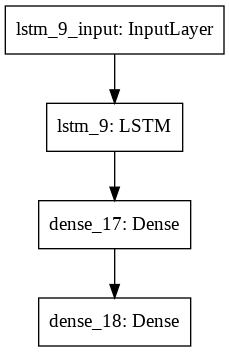

In [91]:
from keras.utils import plot_model

plot_model(model)

# Model Training

In [92]:
from keras.optimizers import Adam

model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate = 0.001))
history = model.fit(X_train, y_train, epochs=25, batch_size=8,verbose=1, validation_split = 0.2)

Train on 1142 samples, validate on 286 samples
Epoch 1/25
1142/1142 [==============================] - 1s 952us/step - loss: 0.0181 - val_loss: 0.0026
Epoch 2/25
1142/1142 [==============================] - 1s 657us/step - loss: 0.0018 - val_loss: 0.0011
Epoch 3/25
1142/1142 [==============================] - 1s 671us/step - loss: 0.0010 - val_loss: 6.0757e-04
Epoch 4/25
1142/1142 [==============================] - 1s 668us/step - loss: 8.9909e-04 - val_loss: 0.0015
Epoch 5/25
1142/1142 [==============================] - 1s 638us/step - loss: 8.0616e-04 - val_loss: 5.5757e-04
Epoch 6/25
1142/1142 [==============================] - 1s 650us/step - loss: 6.1657e-04 - val_loss: 4.3795e-04
Epoch 7/25
1142/1142 [==============================] - 1s 665us/step - loss: 6.3543e-04 - val_loss: 4.5560e-04
Epoch 8/25
1142/1142 [==============================] - 1s 661us/step - loss: 5.5835e-04 - val_loss: 3.6200e-04
Epoch 9/25
1142/1142 [==============================] - 1s 638us/step - loss: 5.1

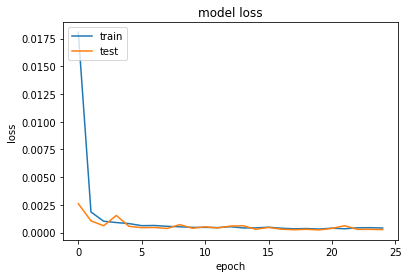

In [93]:
def plot_model_history(history):
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

plot_model_history(history)

# Model Evaluation

In [101]:
# model evaluation on test set

model.evaluate(X_test,y_test)

357/357 [==============================] - 0s 60us/step


0.00027797221977665437

In [0]:
# make predictions

temp_train_pred = model.predict(X_train)
temp_test_pred = model.predict(X_test)

In [0]:
# inverse scaling of the values

train_pred = np.zeros((X_train.shape[0],61))
test_pred = np.zeros((X_test.shape[0],61))

train_pred[:,60]= temp_train_pred[:,0]
test_pred[:,60]= temp_test_pred[:,0]

train_og = np.zeros((X_train.shape[0],61))
test_og = np.zeros((X_test.shape[0],61))

train_og[:,60]= y_train
test_og[:,60]= y_test

train_pred = scaler.inverse_transform(train_pred)
train_og = scaler.inverse_transform(train_og)

test_pred = scaler.inverse_transform(test_pred)
test_og = scaler.inverse_transform(test_og)

In [0]:
trainPredict = train_pred[:,60]
testPredict = test_pred[:,60]

trainY = train_og[:,60]
testY = test_og[:,60]

In [97]:
import math

trainScore = math.sqrt(mean_squared_error(trainY, trainPredict))
print('Train Score: %f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY, testPredict))
print('Test Score: %f RMSE' % (testScore))

Train Score: 4.294294 RMSE
Test Score: 4.525083 RMSE


# Visualising the Predictions of the Model

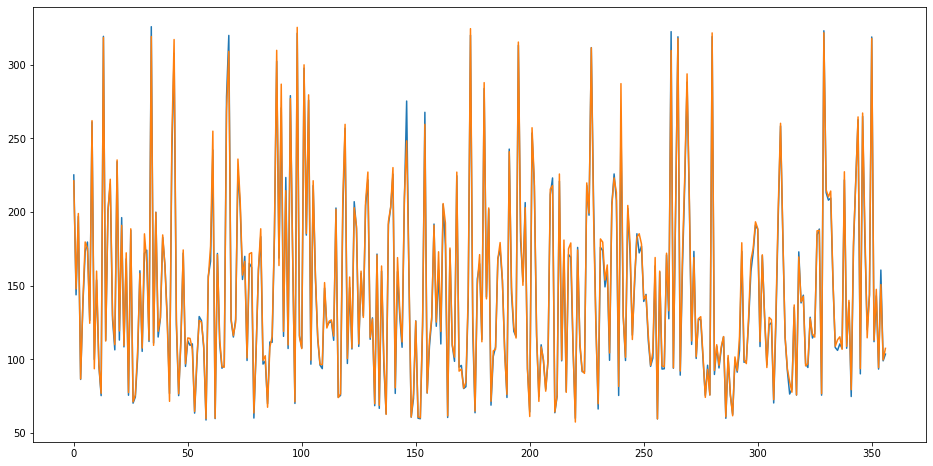

In [98]:
plt.figure(figsize=(16,8))
plt.plot(testPredict)
plt.plot(testY)

plt.show()

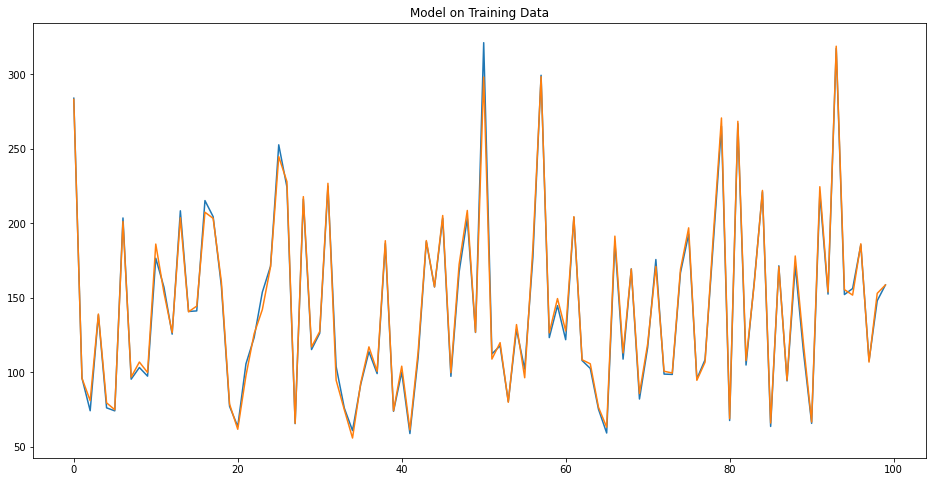

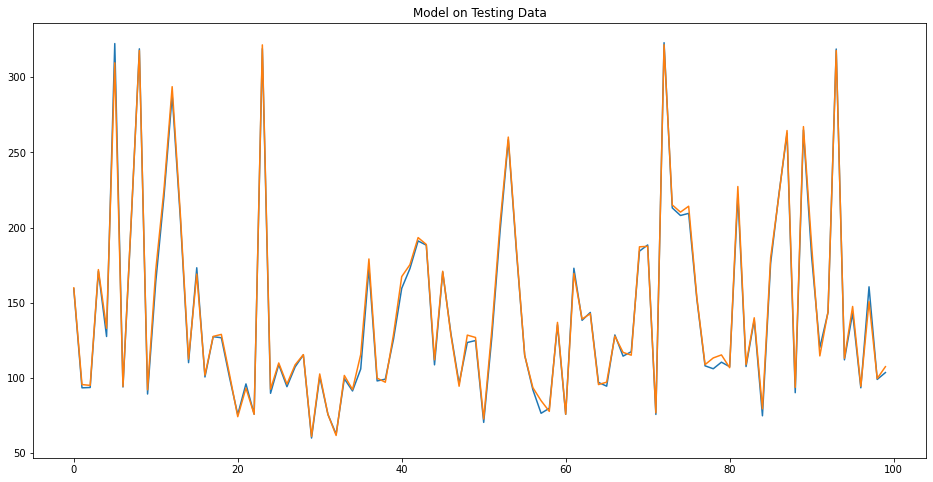

In [99]:
# visualizing model on test and train set to get better insight of the model accuracy

plt.figure(figsize=(16,8))
plt.plot(trainPredict[-100:])
plt.plot(trainY[-100:])
plt.title("Model on Training Data")
plt.show()
plt.figure(figsize=(16,8))
plt.plot(testPredict[-100:])
plt.plot(testY[-100:])
plt.title("Model on Testing Data")
plt.show()